### 1.Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston

In [13]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

#%matplotlib inline

In [14]:
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [15]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [16]:
df_boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
df_boston['MHV'] = boston_dataset.target

In [18]:
#Предобработка : разибение на трейн-тест, нормализация для повышения качества обучения
X = df_boston.drop("MHV", axis=1).values
y= df_boston['MHV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
layer_list = list(range(3,11))
#neuron_list = list(range(10,500, 20))
neuron_list = [10, 25, 50, 100, 200, 400]
activations_list = ["relu", "linear", "softmax"]
optimizator_list = ["Adadelta","adam"] #"sgd",

In [20]:
import itertools

params_list = list(itertools.product(layer_list, neuron_list, activations_list, optimizator_list))
params_list[:2]

[(3, 10, 'relu', 'Adadelta'), (3, 10, 'relu', 'adam')]

In [21]:
def get_best_params(num_layer = None , num_neuron = None, f_acrivation = None, name_optimizator = None):
  model = Sequential()
  model.add(Dense(50, activation='relu'))
  for _n in range(num_layer):
    model.add(Dense(num_neuron, activation=f_acrivation))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mse', optimizer=name_optimizator, metrics=["mse", "msle"])
  return model

In [22]:
rez_list = []

In [23]:
for i in range(len(params_list)):
    #print(params_list[i][0])
    #print(params_list[i][1])
    #print(params_list[i][2])
    #print(params_list[i][3])      
    model = get_best_params(params_list[i][0], params_list[i][1], params_list[i][2], params_list[i][3])
    #print(rez_funk)
    row_rez_list = []
    #row_rez_list = list(params_list[i][0], params_list[i][1], params_list[i][2], params_list[i][3])
    row_rez_list.append(params_list[i][0])
    row_rez_list.append(params_list[i][1])
    row_rez_list.append(params_list[i][2])
    row_rez_list.append(params_list[i][3])
    early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)

    model.fit(X_train, y_train, epochs=1000, callbacks=[early_stop], validation_data=[X_test, y_test], verbose=0)

    predictions = model.predict(X_test)

    y_train_predict = model.predict(X_train)
    
    r2_tr = r2_score(y_train, y_train_predict)
    row_rez_list.append(r2_tr)
    
    y_test_predict = model.predict(X_test)
    
    r2_ts = r2_score(y_test, y_test_predict)
    row_rez_list.append(r2_ts)
    print(row_rez_list)

    rez_list.append(row_rez_list)

[3, 10, 'relu', 'Adadelta', -0.23769378669152852, -0.2137023802519038]
[3, 10, 'relu', 'adam', 0.8411291597347226, 0.7008257318555521]
[3, 10, 'linear', 'Adadelta', 0.08492345996688788, 0.10492106782246313]
[3, 10, 'linear', 'adam', 0.8843759699507775, 0.7356659368945158]
[3, 10, 'softmax', 'Adadelta', -4.929794085840283, -6.213952551441654]
[3, 10, 'softmax', 'adam', -1.6769174175923496e-06, -0.0035691624235645314]
[3, 25, 'relu', 'Adadelta', 0.05983790318139692, 0.040458092339261786]
[3, 25, 'relu', 'adam', 0.9110638780486031, 0.7752390090571019]
[3, 25, 'linear', 'Adadelta', -0.2197905029061391, -0.22367309277024683]
[3, 25, 'linear', 'adam', 0.9149305089861621, 0.746956368027958]
[3, 25, 'softmax', 'Adadelta', -3.57521735031317, -4.545132681738829]
[3, 25, 'softmax', 'adam', -1.4418901388424388e-06, -0.003579847186670815]
[3, 50, 'relu', 'Adadelta', 0.12092535250058001, 0.11466355197862887]
[3, 50, 'relu', 'adam', 0.9283892181054594, 0.7869069879020877]
[3, 50, 'linear', 'Adadelta'

In [24]:
rez_list

[[3, 10, 'relu', 'Adadelta', -0.23769378669152852, -0.2137023802519038],
 [3, 10, 'relu', 'adam', 0.8411291597347226, 0.7008257318555521],
 [3, 10, 'linear', 'Adadelta', 0.08492345996688788, 0.10492106782246313],
 [3, 10, 'linear', 'adam', 0.8843759699507775, 0.7356659368945158],
 [3, 10, 'softmax', 'Adadelta', -4.929794085840283, -6.213952551441654],
 [3, 10, 'softmax', 'adam', -1.6769174175923496e-06, -0.0035691624235645314],
 [3, 25, 'relu', 'Adadelta', 0.05983790318139692, 0.040458092339261786],
 [3, 25, 'relu', 'adam', 0.9110638780486031, 0.7752390090571019],
 [3, 25, 'linear', 'Adadelta', -0.2197905029061391, -0.22367309277024683],
 [3, 25, 'linear', 'adam', 0.9149305089861621, 0.746956368027958],
 [3, 25, 'softmax', 'Adadelta', -3.57521735031317, -4.545132681738829],
 [3, 25, 'softmax', 'adam', -1.4418901388424388e-06, -0.003579847186670815],
 [3, 50, 'relu', 'Adadelta', 0.12092535250058001, 0.11466355197862887],
 [3, 50, 'relu', 'adam', 0.9283892181054594, 0.7869069879020877],


In [27]:
columns_params = ['num_layer', 'num_neuron', 'f_acrivation', 'name_optimizator', 'r2_train', 'r2_test']
df_rezult = pd.DataFrame(rez_list, columns = columns_params)


,num_layer,num_neuron,f_acrivation,name_optimizator,r2_train,r2_test
0,3,10,relu,Adadelta,-0.237694,-0.213702
1,3,10,relu,adam,0.841129,0.700826
2,3,10,linear,Adadelta,0.084923,0.104921
3,3,10,linear,adam,0.884376,0.735666
4,3,10,softmax,Adadelta,-4.929794,-6.213953


In [28]:
df_rezult

,num_layer,num_neuron,f_acrivation,name_optimizator,r2_train,r2_test
0,3,10,relu,Adadelta,-2.376938e-01,-0.213702
1,3,10,relu,adam,8.411292e-01,0.700826
2,3,10,linear,Adadelta,8.492346e-02,0.104921
3,3,10,linear,adam,8.843760e-01,0.735666
4,3,10,softmax,Adadelta,-4.929794e+00,-6.213953
...,...,...,...,...,...,...
283,10,400,relu,adam,8.644828e-01,0.701365
284,10,400,linear,Adadelta,7.393742e-01,0.584533
285,10,400,linear,adam,8.495876e-01,0.564592
286,10,400,softmax,Adadelta,-3.076456e-02,-0.064130


In [ ]:
df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

In [61]:
df_num_layer = df_rezult[(df_rezult['num_layer'] == 7) & (df_rezult['f_acrivation'] == 'linear')]

In [62]:
df_num_layer

,num_layer,num_neuron,f_acrivation,name_optimizator,r2_train,r2_test
146,7,10,linear,Adadelta,-0.028843,-0.014647
147,7,10,linear,adam,0.903755,0.736914
152,7,25,linear,Adadelta,0.350347,0.290251
153,7,25,linear,adam,0.908973,0.753923
158,7,50,linear,Adadelta,0.623401,0.532180
159,7,50,linear,adam,0.930652,0.772451
164,7,100,linear,Adadelta,0.604514,0.491867
165,7,100,linear,adam,0.901463,0.737544
170,7,200,linear,Adadelta,0.767100,0.645129
171,7,200,linear,adam,0.891896,0.746143


1.Увеличение слоев при достаточном количестве нейронов, оказывает слабое влияние на ошибку.<br>
2.Увеличение количества нейронов при достаточном (>10) количестве, оказывает слабое влияние на ошибку.<br>
3.Основное влияние имеют тип функции активации, и вид оптимизатора. Применение нелинейной функция активации softmax, как и оптимизатора adam, минимизирует ошибку.
4.Функция активации linear в сочетании с оптимизацией Adadelta, дает хороший результат на малом количесте (до 10) нейронов, затем переобчается.  

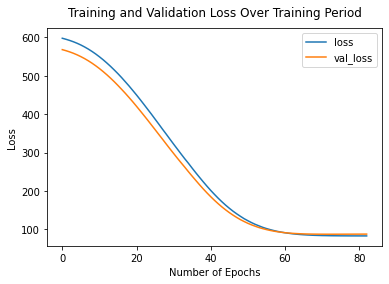

In [890]:
#loss_df = pd.DataFrame(model.history.history)
#loss_df[['loss', 'val_loss']].plot()
#plt.xlabel("Number of Epochs")
#plt.ylabel("Loss")
#plt.title("Training and Validation Loss Over Training Period", pad=12);